In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import scipy.linalg as la

from visualise import (
    plot_3d_control,
    plot_action_history,
    plot_state_history,
    plot_terminal_cost_lyupanov,
)

import terminal_set
from mpc_with_ots import Controller
from main_disturbance import simulate


In [17]:
dt = 0.10  # Sampling period
N = 20 # MPC Horizon
T = 100  # Duration of simulation
x_init = np.zeros(12)  # Initial conditions
y_target = np.zeros(3)  # State to reach
y_target[0:3] = np.array([0.5, 0.0, 0.0])
# y_target[3:6] = np.array([0.0, 0.00, 0.0])

print("Initial state is ", x_init)
print("Target state to reach is ", y_target)

 # Controller
ctrl = Controller(
    mpc_horizon=N,
    timestep_mpc_stages=dt,
    control_type='mpc' # or 'mpc'
)

ctrl.d = np.array([0.0, 0.1, 0.0])

(x_target, u_target) = ctrl.computeOTS(y_target)

# this also rebuilds mpc problem to include the new constraint
# Q: Can I have both of these methods working together?
# ctrl.c_level = terminal_set.calculate_c(ctrl, x_target) # this enables t set
# ctrl.beta = 0.1 # this enables terminal cost


# print("C is ", ctrl.c_level)

# states, inputs, plans, timesteps, Vf, l, outputs, disturbance_est= simulate(
#     controller=ctrl,
#     x_init=x_init,
#     y_target=y_target,
#     T=T,
#     plot=True,
#     plots_suffix="_disturbance"
#     )

# print(x_target)
# print(u_target)


Initial state is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Target state to reach is  [0.5 0.  0. ]


ValueError: Invalid dimensions (3,) for Parameter value.

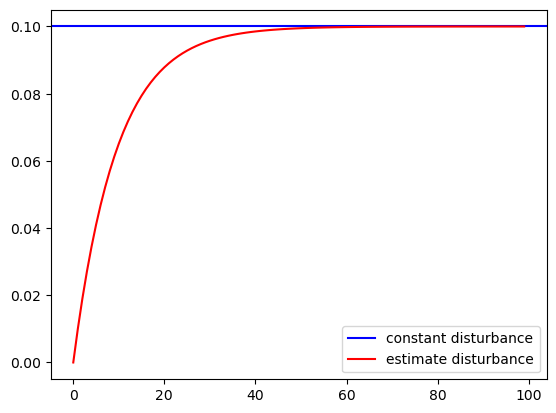

In [5]:
disturbance_est[:, 100]

plt.axhline(ctrl.d[1], color='b', label='constant disturbance')
plt.plot(range(T), disturbance_est[1, :-1], color='r', label='estimate disturbance')
plt.legend()

In [9]:
y_target = np.zeros(6)  # State to reach
y_target[0:3] = np.array([0.5, 0.0, 0.0])
y_target[3:6] = np.array()

# self.C = np.hstack(
#         (np.identity(6), np.zeros((6, 6)))
#     )  # only interested in xyz, xyz_dot

mat1 = np.concatenate((np.identity(12) - ctrl.A, -ctrl.B), axis=1)
mat2 = np.concatenate((ctrl.C, np.zeros((6, 4))), axis=1)
A_cstr = np.concatenate((mat1, mat2), axis=0)
b_cstr = np.hstack((np.zeros(12), (y_target)))

In [10]:
xu_r = np.hstack((x_init, np.array([0.0, 0.0, 0.0, 0.0])))

In [11]:
from pprint import pprint
pprint((A_cstr @  xu_r))
pprint(b_cstr)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])
array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5,
       0. , 0. , 0. , 0. , 0. ])


In [4]:
C = np.zeros((6, 12))
C[:3, :3] = np.identity(3)

In [5]:
C

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])